In [1]:
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.resnet50 import preprocess_input 

from keras.applications.resnet50 import ResNet50 
from keras.models import Model

from sklearn.decomposition import PCA

import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

In [2]:
DATA_PATH = 'small_set/'

In [3]:
data_files = {
    'abstract': [],
    'animal-painting': [],
    'cityscape': [],
    'figurative': [],
    'flower-painting': [],
    'genre-painting': [],
    'landscape': [],
    'marina': [],
    'mythological-painting': [],
    'nude-painting-nu': [],
    'portrait': [],
    'religious-painting': [],
    'still-life': [],
    'symbolic-painting': []
}

In [4]:
for dirpath, dirnames, files in os.walk(DATA_PATH):
    for file_name in files:
        data_files[os.path.basename(dirpath)].append(load_img(os.path.join(dirpath, file_name), target_size=(224,224)))
        
len(data_files['marina'])

50

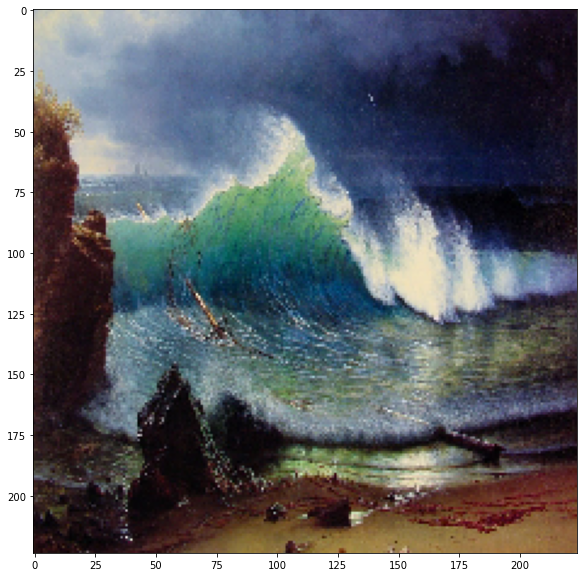

In [5]:
plt.figure(figsize=(10,10))
plt.imshow(data_files['marina'][0])

In [6]:
for key in data_files:
    data_files[key][:] = [preprocess_input(np.array(img).reshape(1,224,224,3)) for img in data_files[key]]

In [7]:
model = ResNet50()

model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

In [8]:
result = model.predict(data_files['marina'][0], use_multiprocessing=True)

In [9]:
result.shape

(1, 2048)

In [10]:
predictions = dict.fromkeys(data_files)

In [11]:
for key in data_files:
    print(key)
    i = 1
    predictions[key] = []
    for img in data_files[key]:
        print(i, end=' ')
        i += 1
        predictions[key].append(model.predict(img, use_multiprocessing=True))
    print('\n')

abstract
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 

animal-painting
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 

cityscape
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 

figurative
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 

flower-painting
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 

genre-painting
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 

landscape
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 2

In [12]:
all_imgs = []

for key in predictions:
    for img in predictions[key]:
        all_imgs.append(img.reshape(img.shape[1]))

In [13]:
all_imgs = np.array(all_imgs)

In [14]:
all_imgs.shape

(700, 2048)

In [15]:
pca = PCA(n_components=2)

all_imgs = pca.fit_transform(all_imgs)

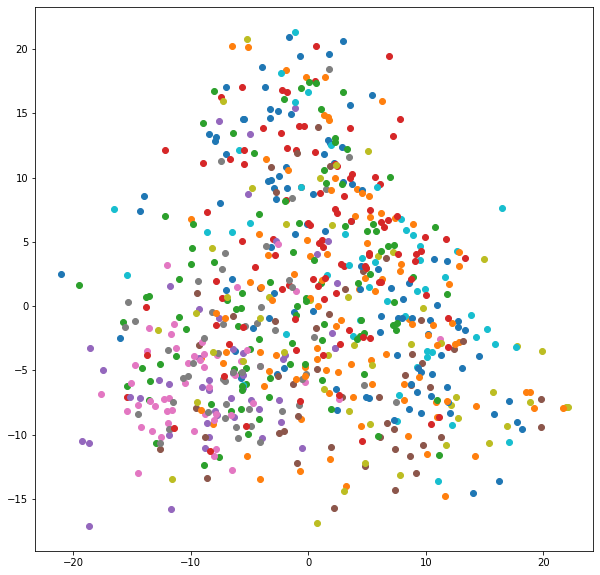

In [19]:
plt.figure(figsize=(10,10))

genre_offset = len(data_files['marina'])
for i in range(0, len(data_files.keys())):
    plt.scatter(all_imgs[0 + i * genre_offset : 0 + i * genre_offset + genre_offset, 0], 
                all_imgs[0 + i * genre_offset : 0 + i * genre_offset + genre_offset, 1])

plt.show()